In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/ 

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json 

In [ ]:
!kaggle datasets download -d pranavraikokte/covid19-image-dataset

covid19-image-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/covid19-image-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()  #unzipping the file and reading it

In [ ]:
import numpy as np 
import pandas as pd 
import random
import tensorflow as tf
import os , cv2 
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
import keras 
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Input, Dropout

In [ ]:
train= keras.utils.image_dataset_from_directory(
    directory = '/content/Covid19-dataset/train',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(256,256) 
)

test= keras.utils.image_dataset_from_directory(
    directory = '/content/Covid19-dataset/test',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(256,256)
)

Found 251 files belonging to 3 classes.
Found 66 files belonging to 3 classes.


In [ ]:
train

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

In [ ]:
# Normalize the dataset by dividing the image pixel to 255. we can also use minmax scaler to normalize the data
def process(image,label):
    image = tf.cast(image/255. ,tf.float32) #here float is to print the reminder in float form
    return image,label 

train= train.map(process)
test= test.map(process) 

In [ ]:
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization()) 
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(3, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [ ]:
from keras import callbacks# importing callbacks from keras to use early stopping

In [ ]:
#early stopping helps in stopping the running of epochs, when there is a best accuracy among them.
callback= tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train,epochs= 100,validation_data=test,callbacks=[callback])  

Epoch 1/100
8/8 [==============================] - 14s 498ms/step - loss: 5.6845 - accuracy: 0.7530 - val_loss: 3.5945 - val_accuracy: 0.3030
Epoch 2/100
8/8 [==============================] - 6s 186ms/step - loss: 1.1607 - accuracy: 0.9323 - val_loss: 5.1696 - val_accuracy: 0.5152
Epoch 3/100
8/8 [==============================] - 4s 186ms/step - loss: 0.6920 - accuracy: 0.9602 - val_loss: 0.5093 - val_accuracy: 0.7727
Epoch 4/100
8/8 [==============================] - 4s 189ms/step - loss: 1.1563 - accuracy: 0.9402 - val_loss: 2.8408 - val_accuracy: 0.6364
Epoch 5/100
8/8 [==============================] - 4s 161ms/step - loss: 0.3961 - accuracy: 0.9721 - val_loss: 5.8928 - val_accuracy: 0.5455
Epoch 6/100
8/8 [==============================] - 4s 158ms/step - loss: 0.2675 - accuracy: 0.9841 - val_loss: 10.2729 - val_accuracy: 0.4848
Epoch 7/100
8/8 [==============================] - 4s 163ms/step - loss: 0.3501 - accuracy: 0.9761 - val_loss: 13.7180 - val_accuracy: 0.3939
Epoch 8/10

In [ ]:
len(history.history['loss'])

79

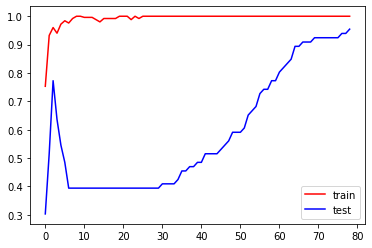

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='test')
plt.legend()
plt.show() 

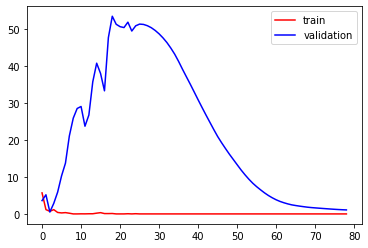

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

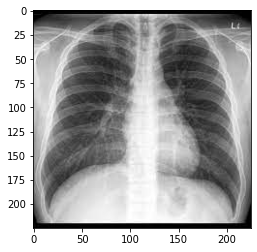

In [ ]:
test_img = cv2.imread('/content/normal.jfif.jpg')
plt.imshow(test_img)

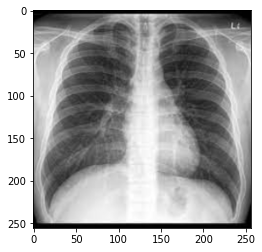

In [ ]:
test_img.shape
test_img_scale=cv2.resize(test_img,(256,256))  #resizing the img to 256,256
plt.imshow(test_img_scale) 

In [ ]:
test_input=test_img_scale.reshape((1,256,256,3)) #reshaping the image
model.predict(test_input) 


1/1 [==============================] - 0s 184ms/step


array([[0., 1., 0.]], dtype=float32)

In [ ]:
np.argmax(model.predict(test_input)) 


1/1 [==============================] - 0s 18ms/step


1

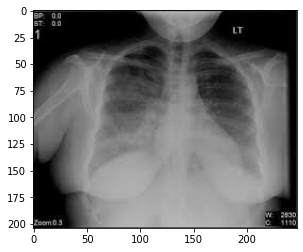

In [ ]:
test_img = cv2.imread('/content/viral.jfif.jpg')
plt.imshow(test_img)

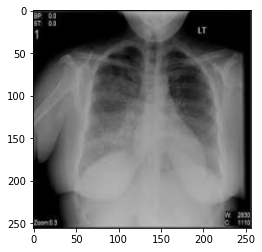

In [ ]:
test_img.shape
test_img_scale=cv2.resize(test_img,(256,256))  #resizing the img to 256,256
plt.imshow(test_img_scale)

In [ ]:
test_input=test_img_scale.reshape((1,256,256,3)) #reshaping the image
model.predict(test_input) 

1/1 [==============================] - 0s 18ms/step


array([[0., 0., 1.]], dtype=float32)

In [ ]:
np.argmax(model.predict(test_input)) 

1/1 [==============================] - 0s 16ms/step


2

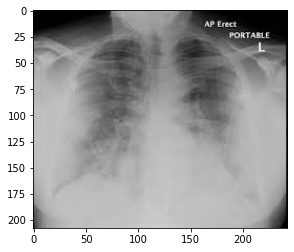

In [ ]:
test_img = cv2.imread('/content/c.jfif.jpg')
plt.imshow(test_img)

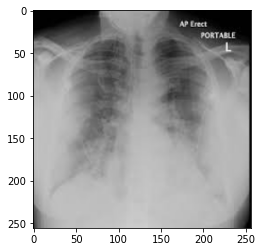

In [ ]:
test_img.shape
test_img_scale=cv2.resize(test_img,(256,256))  #resizing the img to 256,256
plt.imshow(test_img_scale)

In [ ]:
test_input=test_img_scale.reshape((1,256,256,3)) #reshaping the image
model.predict(test_input) 

1/1 [==============================] - 0s 51ms/step


array([[1., 0., 0.]], dtype=float32)

In [ ]:
np.argmax(model.predict(test_input)) 


1/1 [==============================] - 0s 16ms/step


0